<a href="https://colab.research.google.com/github/robinsingh2022/MSDS458/blob/main/Assignment%204/Assignment4COVIDMSDS458.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Ingest

In [ ]:
import datetime
from packaging import version
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import os
import cv2


# Helper libraries
import datetime
from packaging import version
import matplotlib as mpl  # EA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier

from collections import Counter
import numpy as np
import pandas as pd

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

In [ ]:
directory="/content/drive/MyDrive/COVID_IEEE"
categories=['covid','normal', 'virus']

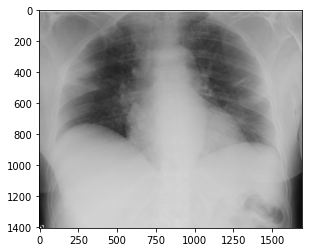

In [ ]:
for category in categories:
    path = os.path.join(directory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()

        break  # we just want one for now so break
    break  #...and one more!

In [ ]:
print(img_array)

[[178 178 178 ... 178 178 178]
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 ...
 [  5   3  10 ...  17  17  16]
 [  5   4  10 ...  17  17  16]
 [  5   4  10 ...  17  17  16]]


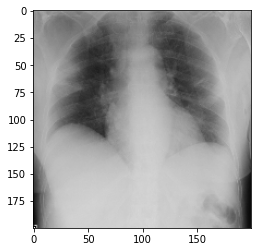

In [ ]:
img_size=200
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
training_data = []

def create_training_data():
    for category in categories:

        path = os.path.join(directory,category)
        class_num = categories.index(category)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

print(len(training_data))

1823


In [ ]:
import random

random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
    print(sample[1])

2
2
2
1
2
1
0
0
2
1


In [ ]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, img_size, img_size, 1))

X = np.array(X).reshape(-1, img_size, img_size, 1)

[[[[ 73]
   [ 75]
   [ 67]
   ...
   [ 98]
   [100]
   [114]]

  [[ 75]
   [ 75]
   [ 76]
   ...
   [103]
   [111]
   [114]]

  [[ 75]
   [ 72]
   [ 95]
   ...
   [109]
   [109]
   [117]]

  ...

  [[ 14]
   [ 12]
   [ 10]
   ...
   [ 43]
   [ 41]
   [  0]]

  [[ 14]
   [ 12]
   [ 11]
   ...
   [ 45]
   [ 42]
   [  1]]

  [[ 14]
   [ 12]
   [ 11]
   ...
   [ 44]
   [ 44]
   [  2]]]]


In [ ]:
y[:10]

[2, 2, 2, 1, 2, 1, 0, 0, 2, 1]

In [ ]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
y[:10]

[2, 2, 2, 1, 2, 1, 0, 0, 2, 1]

In [ ]:
from tensorflow.keras.utils import to_categorical
y_encoded = to_categorical(y)

In [ ]:
y_encoded[:10]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
y_encoded.shape

(1823, 3)

In [ ]:
X.shape

(1823, 200, 200, 1)

In [ ]:
X_reshape=np.reshape(X, (1823, 40000))

In [ ]:
X_reshape.shape

(1823, 40000)

In [ ]:
X_reshape


array([[ 73,  75,  67, ...,  44,  44,   2],
       [  9,   7,  16, ..., 175, 193, 212],
       [119, 104,  78, ...,  59,  37,  24],
       ...,
       [ 65,  71,  71, ...,   0,   0, 102],
       [ 46,  57,  63, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [ ]:
y_np=np.array(y)

In [ ]:
type(y_np)

numpy.ndarray

In [ ]:
y_np

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
type(X_reshape)

numpy.ndarray

In [ ]:
model = Sequential([
    Dense(input_shape=[40000], units = 512, activation = tf.nn.relu),

    Dense(name = "output_layer", units = 3, activation = tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               20480512  
_________________________________________________________________
output_layer (Dense)         (None, 3)                 1539      
Total params: 20,482,051
Trainable params: 20,482,051
Non-trainable params: 0
_________________________________________________________________


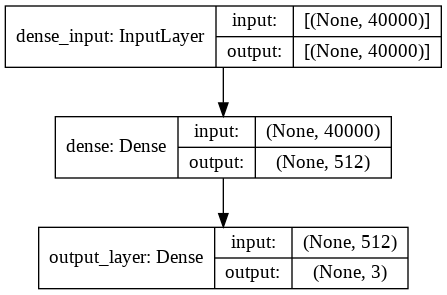

In [ ]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)


In [ ]:
model.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history = model.fit(
    X_reshape
    ,y_encoded
    ,epochs = 50
   ,validation_split=0.20
    )

Epoch 1/50
46/46 [==============================] - 1s 10ms/step - loss: 10317.0566 - accuracy: 0.5206 - val_loss: 2711.5903 - val_accuracy: 0.6192
Epoch 2/50
46/46 [==============================] - 0s 7ms/step - loss: 3376.7832 - accuracy: 0.5995 - val_loss: 2148.2529 - val_accuracy: 0.6082
Epoch 3/50
46/46 [==============================] - 0s 7ms/step - loss: 2333.5798 - accuracy: 0.6680 - val_loss: 2674.6328 - val_accuracy: 0.6192
Epoch 4/50
46/46 [==============================] - 0s 7ms/step - loss: 1416.1603 - accuracy: 0.7181 - val_loss: 1505.6339 - val_accuracy: 0.6575
Epoch 5/50
46/46 [==============================] - 0s 7ms/step - loss: 1314.7350 - accuracy: 0.7119 - val_loss: 205.0203 - val_accuracy: 0.8986
Epoch 6/50
46/46 [==============================] - 0s 7ms/step - loss: 823.8153 - accuracy: 0.7668 - val_loss: 1300.6189 - val_accuracy: 0.6603
Epoch 7/50
46/46 [==============================] - 0s 7ms/step - loss: 722.3691 - accuracy: 0.7606 - val_loss: 654.6665 - v

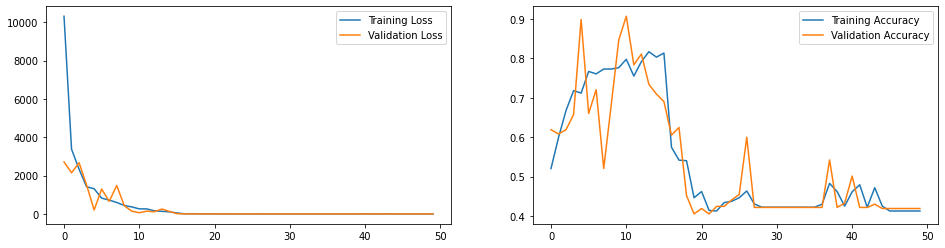

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [ ]:
# Get the predicted classes:
#pred_classes = model.predict_classes(x_train_norm)# give deprecation warning
pred_classes = np.argmax(model.predict(X_reshape), axis=-1)
pred_classes

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
conf_mx = tf.math.confusion_matrix(y_np, pred_classes)
conf_mx

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 86, 450,   0],
       [  0, 668,   0],
       [  0, 618,   1]], dtype=int32)>

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
preds = model.predict(X_reshape)
df = pd.DataFrame(preds[0:20], columns = ['0', '1', '2'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2
0,25.01%,39.03%,35.97%
1,25.01%,39.03%,35.97%
2,25.01%,39.03%,35.97%
3,25.01%,39.03%,35.97%
4,25.01%,39.03%,35.97%
5,25.01%,39.03%,35.97%
6,25.01%,39.03%,35.97%
7,25.01%,39.03%,35.97%
8,25.01%,39.03%,35.97%
9,25.01%,39.03%,35.97%


In [ ]:
model = Sequential([
    Dense(input_shape=[40000], units = 128, activation = tf.nn.relu),

    Dense(name = "output_layer", units = 3, activation = tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               5120128   
_________________________________________________________________
output_layer (Dense)         (None, 3)                 387       
Total params: 5,120,515
Trainable params: 5,120,515
Non-trainable params: 0
_________________________________________________________________


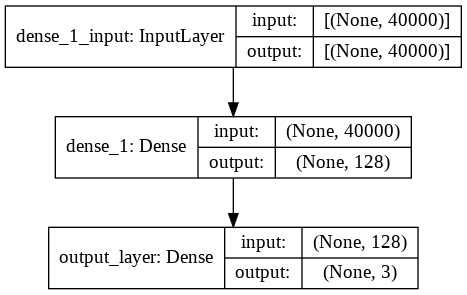

In [ ]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)


In [ ]:
model.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history = model.fit(
    X_reshape
    ,y_encoded
    ,epochs = 50
   ,validation_split=0.20
    )

Epoch 1/50
46/46 [==============================] - 1s 7ms/step - loss: 1706.2051 - accuracy: 0.3416 - val_loss: 1.0983 - val_accuracy: 0.3479
Epoch 2/50
46/46 [==============================] - 0s 4ms/step - loss: 2.8827 - accuracy: 0.3368 - val_loss: 1.0976 - val_accuracy: 0.3479
Epoch 3/50
46/46 [==============================] - 0s 4ms/step - loss: 1.0975 - accuracy: 0.3505 - val_loss: 1.0965 - val_accuracy: 0.3671
Epoch 4/50
46/46 [==============================] - 0s 4ms/step - loss: 1.0968 - accuracy: 0.3663 - val_loss: 1.0958 - val_accuracy: 0.3671
Epoch 5/50
46/46 [==============================] - 0s 4ms/step - loss: 1.0963 - accuracy: 0.3663 - val_loss: 1.0951 - val_accuracy: 0.3671
Epoch 6/50
46/46 [==============================] - 0s 4ms/step - loss: 1.0959 - accuracy: 0.3663 - val_loss: 1.0947 - val_accuracy: 0.3671
Epoch 7/50
46/46 [==============================] - 0s 4ms/step - loss: 1.0957 - accuracy: 0.3663 - val_loss: 1.0943 - val_accuracy: 0.3671
Epoch 8/50
46/46 

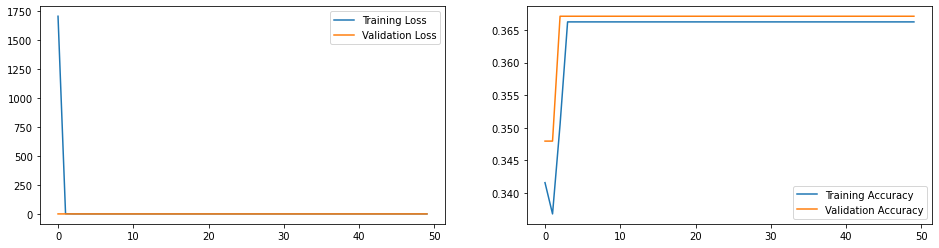

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [ ]:
# Get the predicted classes:
#pred_classes = model.predict_classes(x_train_norm)# give deprecation warning
pred_classes = np.argmax(model.predict(X_reshape), axis=-1)
pred_classes

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
conf_mx = tf.math.confusion_matrix(y_np, pred_classes)
conf_mx

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[  0, 536,   0],
       [  0, 668,   0],
       [  0, 619,   0]], dtype=int32)>

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
preds = model.predict(X_reshape)
df = pd.DataFrame(preds[0:20], columns = ['0', '1', '2'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2
0,29.66%,36.57%,33.77%
1,29.66%,36.57%,33.77%
2,29.66%,36.57%,33.77%
3,29.66%,36.57%,33.77%
4,29.66%,36.57%,33.77%
5,29.66%,36.57%,33.77%
6,29.66%,36.57%,33.77%
7,29.66%,36.57%,33.77%
8,29.66%,36.57%,33.77%
9,29.66%,36.57%,33.77%


In [ ]:
model = Sequential([
    Dense(input_shape=[40000], units = 512, activation = tf.nn.relu),
    Dense(512,activation=tf.nn.relu),
    Dense(256,activation=tf.nn.relu),
    Dense(128,activation=tf.nn.relu),
    Dense(name = "output_layer", units = 3, activation = tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               20480512  
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 3)                 387       
Total params: 20,907,779
Trainable params: 20,907,779
Non-trainable params: 0
_________________________________________________________________


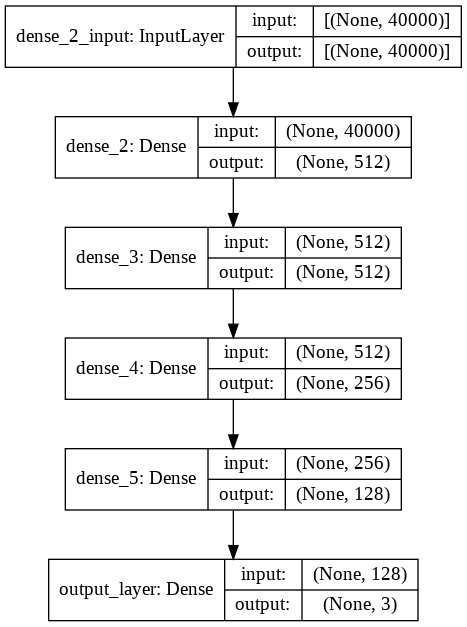

In [ ]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True)


In [ ]:
model.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history = model.fit(
    X_reshape
    ,y_encoded
    ,epochs = 50
   ,validation_split=0.20
   )

Epoch 1/50
46/46 [==============================] - 1s 10ms/step - loss: 3534.0120 - accuracy: 0.3752 - val_loss: 253.0630 - val_accuracy: 0.2849
Epoch 2/50
46/46 [==============================] - 0s 7ms/step - loss: 120.7674 - accuracy: 0.4266 - val_loss: 1.0660 - val_accuracy: 0.4301
Epoch 3/50
46/46 [==============================] - 0s 7ms/step - loss: 5.0544 - accuracy: 0.3745 - val_loss: 1.0963 - val_accuracy: 0.3699
Epoch 4/50
46/46 [==============================] - 0s 7ms/step - loss: 1.0966 - accuracy: 0.3663 - val_loss: 1.0943 - val_accuracy: 0.3699
Epoch 5/50
46/46 [==============================] - 0s 7ms/step - loss: 1.0955 - accuracy: 0.3663 - val_loss: 1.0934 - val_accuracy: 0.3699
Epoch 6/50
46/46 [==============================] - 0s 7ms/step - loss: 1.0955 - accuracy: 0.3663 - val_loss: 1.0931 - val_accuracy: 0.3699
Epoch 7/50
46/46 [==============================] - 0s 7ms/step - loss: 1.0955 - accuracy: 0.3663 - val_loss: 1.0932 - val_accuracy: 0.3699
Epoch 8/50
4

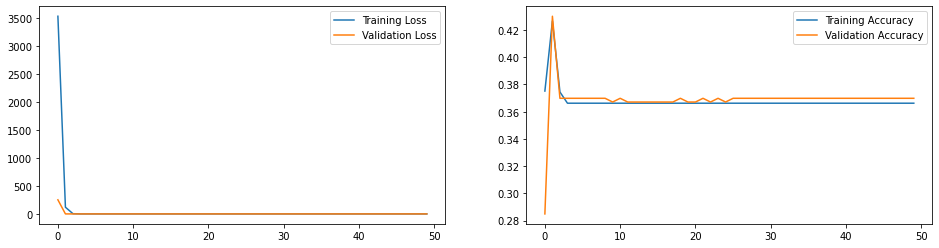

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [ ]:
# Get the predicted classes:
#pred_classes = model.predict_classes(x_train_norm)# give deprecation warning
pred_classes = np.argmax(model.predict(X_reshape), axis=-1)
pred_classes

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
conf_mx = tf.math.confusion_matrix(y_np, pred_classes)
conf_mx

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[  0, 536,   0],
       [  0, 668,   0],
       [  0, 618,   1]], dtype=int32)>

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
preds = model.predict(X_reshape)
df = pd.DataFrame(preds[0:20], columns = ['0', '1', '2'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2
0,29.56%,36.43%,34.01%
1,29.56%,36.43%,34.01%
2,29.56%,36.43%,34.01%
3,29.56%,36.43%,34.01%
4,29.56%,36.43%,34.01%
5,29.56%,36.43%,34.01%
6,29.56%,36.43%,34.01%
7,29.56%,36.43%,34.01%
8,29.56%,36.43%,34.01%
9,29.56%,36.43%,34.01%


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(64))

model.add(Dense(3))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history=model.fit(X, y_encoded, batch_size=32, epochs=200, validation_split=0.2,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20)] )

Epoch 1/200
46/46 [==============================] - 19s 99ms/step - loss: 9246.0498 - accuracy: 0.5953 - val_loss: 86.9348 - val_accuracy: 0.8384
Epoch 2/200
46/46 [==============================] - 4s 91ms/step - loss: 27.8782 - accuracy: 0.8903 - val_loss: 10.5615 - val_accuracy: 0.9151
Epoch 3/200
46/46 [==============================] - 4s 91ms/step - loss: 5.0718 - accuracy: 0.9630 - val_loss: 13.6971 - val_accuracy: 0.9068
Epoch 4/200
46/46 [==============================] - 4s 91ms/step - loss: 2.6265 - accuracy: 0.9595 - val_loss: 12.1272 - val_accuracy: 0.9096
Epoch 5/200
46/46 [==============================] - 4s 91ms/step - loss: 0.8473 - accuracy: 0.9870 - val_loss: 10.7256 - val_accuracy: 0.9233
Epoch 6/200
46/46 [==============================] - 4s 91ms/step - loss: 0.3444 - accuracy: 0.9911 - val_loss: 16.1488 - val_accuracy: 0.9096
Epoch 7/200
46/46 [==============================] - 4s 91ms/step - loss: 0.2891 - accuracy: 0.9945 - val_loss: 10.6400 - val_accuracy: 0

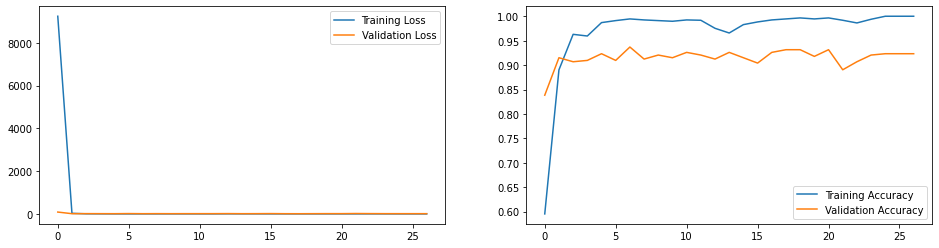

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [ ]:
# Get the predicted classes:
#pred_classes = model.predict_classes(x_train_norm)# give deprecation warning
pred_classes = np.argmax(model.predict(X), axis=-1)
pred_classes

array([0, 2, 2, ..., 1, 0, 1])

In [ ]:
conf_mx = tf.math.confusion_matrix(y_np, pred_classes)
conf_mx

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[534,   2,   0],
       [ 22, 644,   2],
       [ 20,  26, 573]], dtype=int32)>

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
preds = model.predict(X)
df = pd.DataFrame(preds[0:20], columns = ['0', '1', '2'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2
0,100.00%,0.00%,100.00%
1,0.00%,0.00%,100.00%
2,0.00%,0.00%,100.00%
3,0.00%,100.00%,0.00%
4,100.00%,0.00%,100.00%
5,100.00%,0.00%,0.00%
6,0.00%,0.00%,100.00%
7,0.00%,0.00%,100.00%
8,100.00%,0.00%,100.00%
9,0.00%,100.00%,0.00%


In [ ]:
model = Sequential()

model.add(Conv2D(512, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))

model.add(Dense(3))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history=model.fit(X, y_encoded, batch_size=32, epochs=200, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20), tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')] )

Epoch 1/200
46/46 [==============================] - 9s 189ms/step - loss: 5564.5835 - accuracy: 0.6804 - val_loss: 52.7826 - val_accuracy: 0.8466
Epoch 2/200
46/46 [==============================] - 8s 179ms/step - loss: 24.3430 - accuracy: 0.8985 - val_loss: 14.0829 - val_accuracy: 0.9288
Epoch 3/200
46/46 [==============================] - 8s 179ms/step - loss: 5.6725 - accuracy: 0.9520 - val_loss: 9.8086 - val_accuracy: 0.9315
Epoch 4/200
46/46 [==============================] - 8s 180ms/step - loss: 1.7670 - accuracy: 0.9829 - val_loss: 9.1513 - val_accuracy: 0.9425
Epoch 5/200
46/46 [==============================] - 8s 180ms/step - loss: 1.0020 - accuracy: 0.9856 - val_loss: 8.8980 - val_accuracy: 0.9479
Epoch 6/200
46/46 [==============================] - 8s 180ms/step - loss: 1.2424 - accuracy: 0.9829 - val_loss: 11.9890 - val_accuracy: 0.9288
Epoch 7/200
46/46 [==============================] - 8s 179ms/step - loss: 0.7009 - accuracy: 0.9897 - val_loss: 13.9794 - val_accuracy

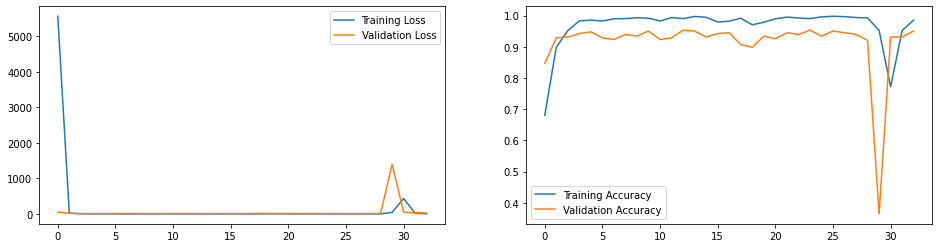

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [ ]:
# Get the predicted classes:
#pred_classes = model.predict_classes(x_train_norm)# give deprecation warning
pred_classes = np.argmax(model.predict(X), axis=-1)
pred_classes

array([0, 2, 2, ..., 1, 0, 1])

In [ ]:
conf_mx = tf.math.confusion_matrix(y_np, pred_classes)
conf_mx

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[532,   1,   3],
       [ 38, 628,   2],
       [ 13, 147, 459]], dtype=int32)>

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
preds = model.predict(X)
df = pd.DataFrame(preds[0:20], columns = ['0', '1', '2'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2
0,100.00%,0.00%,0.00%
1,0.00%,0.00%,100.00%
2,0.00%,0.00%,100.00%
3,0.00%,100.00%,100.00%
4,0.00%,0.00%,100.00%
5,100.00%,0.00%,0.00%
6,0.00%,0.00%,100.00%
7,0.00%,0.00%,100.00%
8,0.00%,0.00%,100.00%
9,0.00%,100.00%,0.00%


In [ ]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))

model.add(Dense(3))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history=model.fit(X, y_encoded, batch_size=32, epochs=200, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10),tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')] )

Epoch 1/200
46/46 [==============================] - 10s 161ms/step - loss: 560.6772 - accuracy: 0.6447 - val_loss: 0.5959 - val_accuracy: 0.7863
Epoch 2/200
46/46 [==============================] - 6s 123ms/step - loss: 0.8764 - accuracy: 0.7956 - val_loss: 0.9254 - val_accuracy: 0.7753
Epoch 3/200
46/46 [==============================] - 6s 123ms/step - loss: 0.4062 - accuracy: 0.8388 - val_loss: 0.6829 - val_accuracy: 0.7890
Epoch 4/200
46/46 [==============================] - 6s 123ms/step - loss: 0.4123 - accuracy: 0.8615 - val_loss: 0.7626 - val_accuracy: 0.7918
Epoch 5/200
46/46 [==============================] - 6s 122ms/step - loss: 0.3731 - accuracy: 0.8519 - val_loss: 1.0523 - val_accuracy: 0.7781
Epoch 6/200
46/46 [==============================] - 6s 122ms/step - loss: 0.3197 - accuracy: 0.8765 - val_loss: 1.2384 - val_accuracy: 0.7890
Epoch 7/200
46/46 [==============================] - 6s 123ms/step - loss: 0.2531 - accuracy: 0.9019 - val_loss: 1.3031 - val_accuracy: 0.8

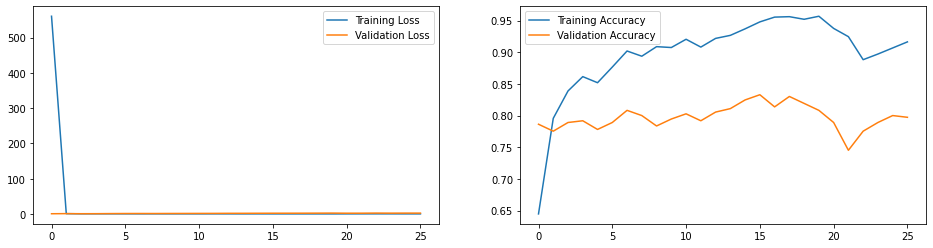

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [ ]:
# Get the predicted classes:
#pred_classes = model.predict_classes(x_train_norm)# give deprecation warning
pred_classes = np.argmax(model.predict(X), axis=-1)
pred_classes

array([0, 2, 2, ..., 0, 0, 1])

In [ ]:
conf_mx = tf.math.confusion_matrix(y_np, pred_classes)
conf_mx

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[529,   7,   0],
       [ 42, 610,  16],
       [109,  18, 492]], dtype=int32)>

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
preds = model.predict(X)
df = pd.DataFrame(preds[0:20], columns = ['0', '1', '2'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2
0,67.33%,31.09%,54.37%
1,0.12%,51.03%,100.00%
2,34.68%,42.94%,84.76%
3,0.02%,100.00%,0.00%
4,2.28%,58.00%,99.90%
5,67.33%,31.09%,54.37%
6,0.06%,0.00%,100.00%
7,0.00%,0.03%,100.00%
8,100.00%,0.00%,100.00%
9,1.14%,97.88%,79.43%


In [ ]:
model = Sequential()

model.add(Conv2D(384, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))

model.add(Dense(3))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history=model.fit(X, y_encoded, batch_size=32, epochs=200, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10), tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')] )

Epoch 1/200
46/46 [==============================] - 10s 167ms/step - loss: 244.3210 - accuracy: 0.6598 - val_loss: 0.7082 - val_accuracy: 0.7562
Epoch 2/200
46/46 [==============================] - 6s 131ms/step - loss: 1.0649 - accuracy: 0.7709 - val_loss: 0.8921 - val_accuracy: 0.7288
Epoch 3/200
46/46 [==============================] - 6s 130ms/step - loss: 0.4666 - accuracy: 0.8162 - val_loss: 0.8864 - val_accuracy: 0.7945
Epoch 4/200
46/46 [==============================] - 6s 130ms/step - loss: 0.3662 - accuracy: 0.8621 - val_loss: 0.7614 - val_accuracy: 0.8027
Epoch 5/200
46/46 [==============================] - 6s 130ms/step - loss: 0.2851 - accuracy: 0.8923 - val_loss: 0.7288 - val_accuracy: 0.8219
Epoch 6/200
46/46 [==============================] - 6s 131ms/step - loss: 0.2649 - accuracy: 0.8923 - val_loss: 1.0112 - val_accuracy: 0.7808
Epoch 7/200
46/46 [==============================] - 6s 130ms/step - loss: 0.2295 - accuracy: 0.9122 - val_loss: 0.9002 - val_accuracy: 0.8

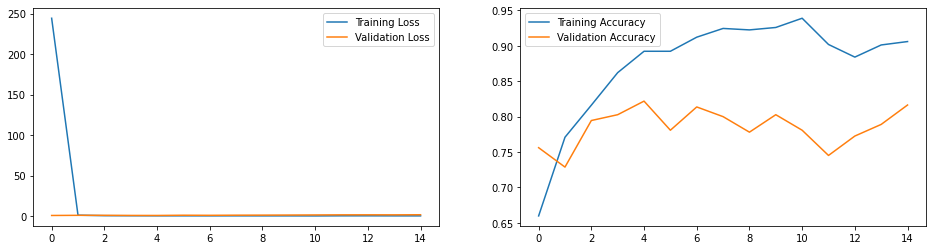

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [ ]:
# Get the predicted classes:
#pred_classes = model.predict_classes(x_train_norm)# give deprecation warning
pred_classes = np.argmax(model.predict(X), axis=-1)
pred_classes

array([0, 2, 2, ..., 0, 0, 2])

In [ ]:
conf_mx = tf.math.confusion_matrix(y_np, pred_classes)
conf_mx

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[518,   7,  11],
       [ 42, 606,  20],
       [ 83,  22, 514]], dtype=int32)>

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
preds = model.predict(X)
df = pd.DataFrame(preds[0:20], columns = ['0', '1', '2'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2
0,64.17%,34.74%,49.68%
1,0.00%,0.43%,100.00%
2,2.47%,16.11%,92.75%
3,51.77%,99.84%,11.12%
4,11.84%,0.00%,100.00%
5,64.17%,34.74%,49.68%
6,0.00%,0.00%,100.00%
7,0.00%,0.00%,100.00%
8,4.11%,0.01%,99.96%
9,10.38%,96.76%,50.28%


In [ ]:
model = Sequential()

model.add(Conv2D(512, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))

model.add(Dense(3))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history=model.fit(X, y_encoded, batch_size=32, epochs=200, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10), tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')] )

Epoch 1/200
46/46 [==============================] - 9s 179ms/step - loss: 115.0887 - accuracy: 0.6399 - val_loss: 0.7693 - val_accuracy: 0.6548
Epoch 2/200
46/46 [==============================] - 7s 156ms/step - loss: 0.6463 - accuracy: 0.7435 - val_loss: 0.6862 - val_accuracy: 0.7205
Epoch 3/200
46/46 [==============================] - 7s 155ms/step - loss: 0.5031 - accuracy: 0.7990 - val_loss: 0.7143 - val_accuracy: 0.7479
Epoch 4/200
46/46 [==============================] - 7s 156ms/step - loss: 0.4261 - accuracy: 0.8278 - val_loss: 0.8104 - val_accuracy: 0.7534
Epoch 5/200
46/46 [==============================] - 7s 156ms/step - loss: 0.3568 - accuracy: 0.8580 - val_loss: 0.8851 - val_accuracy: 0.7753
Epoch 6/200
46/46 [==============================] - 7s 156ms/step - loss: 0.2952 - accuracy: 0.8793 - val_loss: 0.9264 - val_accuracy: 0.7644
Epoch 7/200
46/46 [==============================] - 7s 155ms/step - loss: 0.2643 - accuracy: 0.8909 - val_loss: 1.0014 - val_accuracy: 0.80

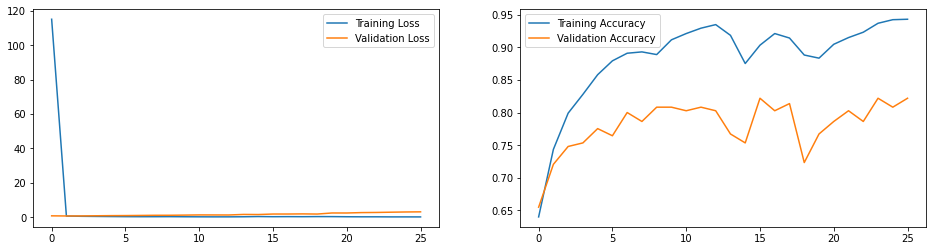

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [ ]:
# Get the predicted classes:
#pred_classes = model.predict_classes(x_train_norm)# give deprecation warning
pred_classes = np.argmax(model.predict(X), axis=-1)
pred_classes

array([0, 2, 2, ..., 0, 0, 1])

In [ ]:
conf_mx = tf.math.confusion_matrix(y_np, pred_classes)
conf_mx

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[527,   8,   1],
       [ 38, 617,  13],
       [ 77,  62, 480]], dtype=int32)>

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
preds = model.predict(X)
df = pd.DataFrame(preds[0:20], columns = ['0', '1', '2'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2
0,71.40%,35.24%,51.17%
1,0.00%,99.98%,100.00%
2,0.06%,24.28%,99.95%
3,0.00%,100.00%,0.00%
4,0.00%,0.00%,100.00%
5,71.40%,35.24%,51.17%
6,0.00%,0.00%,100.00%
7,0.00%,43.72%,100.00%
8,100.00%,0.00%,100.00%
9,0.00%,100.00%,0.24%
